# The Relationship between Fuel Efficiency and Fuel Type

## Are Gasoline or Diesel based engines more efficient?
Group Members: Zibo Shang, Blaise Appolinary, William Suryawidjaja

## 1. Introduction

As human civilization expands, metropolitan cities are growing rapidly. As a result, the bigger commuting zone has resulted in the rising demands for a form of transport that is cost-efficient yet provides a sense of privacy for the passenger, the car. 

Given that, choosing the right car could be a difficult decision to make, as the car types range from family vehicles like sedans and coupes to the high-end, exotic, sport vehicles. In all car types, however, a critical factor to consider is the fuel efficiency. A more efficient car would allow customers to save money on fuel as well as reduce carbon footprints. 

According to a research conducted by the Universal Technical Institute, they found that diesel cars have 20% more thermal efficiency than gasoline cars. This would suggest that diesel-based cars are more efficient gasoline-based cars as the former are able to transfer heat to energy more efficiently. (Baures, 2019; Chevrolet, 2021; Gas vs. Diesel Engines: What’s the Difference?, 2021). As a follow up to this reserach paper, we have decided to investigate this claim by taking a different measure of fuel efficiency, MPG. 

* MPG (miles per gallon), is defined as the distance (measured in miles) that a vehicle can travel per gallon of fuel. If a car has a high MPG value, it would suggest that the car is more fuel-efficient. 

For this project, we will be comparing the means as well as the standard deviations of MPG between diesel-based cars and gasoline-based cars, which would allow us to determine which fuel type is more efficient. Our results will be based on a dataset of Vehicle Fuel Economy Estimates, from 1984-2017, obtained from Kaggle.

<img src="../STAT201_GP_7/intro_pic.png" width="300" height="300" align="center"/>

Introduction Picture (*Gas vs. Diesel Engines: What is the Difference? 2021*)

<img src="../STAT201_GP_7/intro_pic_2.png" width="400" height="400" align="center"/>

Introduction Picture (*What Is the Difference Between Diesel and Gas? Sweeney Chevrolet. 2021*)

## 2. Preliminary Results

In [10]:
library(tidyverse)
library(infer)
library(datateachr)
library(testthat)
library(digest)
library(broom)
library(cowplot)
options(repr.matrix.max.rows = 6)

ERROR: Error in library(infer): there is no package called ‘infer’


### 2.1 Importing the dataset from Kaggle and loading the data into the Jupyter Notebook

In [3]:
df <- read.csv("https://raw.githubusercontent.com/Zibo-S/STAT201_GP_7/main/database.csv", header = TRUE) 
     
head(df)


,Vehicle.ID,Year,Make,Model,Class,Drive,Transmission,Transmission.Descriptor,Engine.Index,Engine.Descriptor,⋯,Hours.to.Charge..AC.240V.,Composite.City.MPG,Composite.Highway.MPG,Composite.Combined.MPG,Range..FT1.,City.Range..FT1.,Highway.Range..FT1.,Range..FT2.,City.Range..FT2.,Highway.Range..FT2.
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,,Manual 5-Speed,,9001,(FFS),⋯,0,0,0,0,0,0,0,,0,0
2,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,,Manual 5-Speed,,9005,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0
3,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,,Manual 5-Speed,,9002,(FFS),⋯,0,0,0,0,0,0,0,,0,0
4,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,,Manual 5-Speed,,9006,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0
5,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,,1830,(FFS),⋯,0,0,0,0,0,0,0,,0,0
6,28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,,1880,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0


Fig 1.1 The uncleaned dataset

### 2.2 Tidying and Cleaning Up Dataset

In [4]:
table(df %>% select('Fuel.Type'))


                        CNG                      Diesel 
                         60                        1014 
                Electricity             Gasoline or E85 
                        133                        1223 
    Gasoline or natural gas         Gasoline or propane 
                         20                           8 
                   Midgrade                     Premium 
                         77                       10133 
    Premium and Electricity  Premium Gas or Electricity 
                         25                          18 
             Premium or E85                     Regular 
                        122                       25258 
Regular Gas and Electricity  Regular Gas or Electricity 
                         20                           2 

Fig 1.2 The fuel type categories and the corresponding number of examples

The dataset that we obtained contains a plethora of different Fuel Types. However, for the purpose of the project, we will only be focusing on two categories of Fuel Types, which are "Diesel" and "Gasoline or E85". There are a few Fuel Types for the Gasoline cars, but we have chosen the "Gasoline or E85" one as the number of examples in that category are similar in number to the diesel ones (Diesel - 1014 Examples, Gasoline or E85 - 1223). Hence, we will filter the dataset for only the examples that have one of the two Fuel Types.

* Note, need to call table to show the number of different fuel types that are there and the count for each type. 

The factors that we are interested in are 
- MPG in the City (median, interquartile): 
- MPG in the Highway (median, interquartile );
- Annual Fuel Cost (mean, sd);

These factors have corresponding columns in the dataset, called City.MPG..FT1 (MPG in the city) in the unit miles, Highway.MPG..FT1 (MPG on the highway) in the unit miles and Annual.Fuel.Cost..FT1 (Annual Fuel Cost) in the unit dollars. Hence, we will select only these columns as well as the Fuel.Types column before we move on with the rest of the investigation. We will also rename the columns for simplicity.

In [5]:
tidy_data <- df %>%
       filter(Fuel.Type == "Diesel" | Fuel.Type == "Gasoline or E85") %>%
       select('Fuel.Type','City.MPG..FT1.', 'Highway.MPG..FT1.', 'Annual.Fuel.Cost..FT1.') %>%
       rename(Fuel_Type = Fuel.Type, City_MPG = City.MPG..FT1., Highway_MPG = Highway.MPG..FT1., Price = Annual.Fuel.Cost..FT1.)
head(tidy_data)

,Fuel_Type,City_MPG,Highway_MPG,Price
,<chr>,<int>,<int>,<int>
1,Diesel,21,31,1550
2,Diesel,21,29,1600
3,Diesel,21,31,1600
4,Diesel,21,31,1550
5,Diesel,21,29,1600
6,Diesel,21,31,1600


### 2.3 Calculating Sample Parameters 

##### Caluculate Median and IQR for each factor we are interested in

In [ ]:
filtered_data <- df %>% 
    select('Fuel.Type','City.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'City.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Diesel" )#,  fuel_type == "Gasoline or E85") %>%
    #group_by(fuel_type) %>%
    #summarize(median = median(as.numeric(as.vector(MPG))))

#City_MPG_Median
diesel_median <- median(as.numeric(as.vector(filtered_data$MPG)))
paste("Median of Diesel in City: ",diesel_median)

diesel_IQR <- IQR(as.numeric(as.vector(filtered_data$MPG)))
paste("IQR of Diesel in City: ",diesel_IQR)


In [ ]:
filtered_data2 <- df %>% 
    select('Fuel.Type','City.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'City.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Gasoline or E85" )
gasoline_median <- median(as.numeric(as.vector(filtered_data2$MPG)))
paste("Median of Gasoline in City: ",gasoline_median)

gasoline_IQR <- IQR(as.numeric(as.vector(filtered_data2$MPG)))
paste("IQR of Gasoline in City: ",gasoline_IQR)

In [ ]:
filtered_data3 <- df %>% 
    select('Fuel.Type','Highway.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'Highway.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Diesel" )#,  fuel_type == "Gasoline or E85") %>%
    #group_by(fuel_type) %>%
    #summarize(median = median(as.numeric(as.vector(MPG))))

#City_MPG_Median
diesel_H_median <- median(as.numeric(as.vector(filtered_data3$MPG)))

paste("Median of Diesel on Highway: ",diesel_H_median)

diesel_H_IQR <- IQR(as.numeric(as.vector(filtered_data3$MPG)))
paste("IQR of Diesel on Highway: ",diesel_H_IQR)


In [ ]:
filtered_data4 <- df %>% 
    select('Fuel.Type','Highway.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'Highway.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Gasoline or E85" )
gasoline_H_median <- median(as.numeric(as.vector(filtered_data4$MPG)))

paste("Median of Gasoline on Highway: ",gasoline_H_median)

gasoline_H_IQR <- IQR(as.numeric(as.vector(filtered_data4$MPG)))

paste("IQR of Gasoline on Highway: ",gasoline_H_IQR)




In [ ]:
summary_medians <- tibble("Diesel in City"=diesel_median , 
                              "Diesel on Highway"=diesel_H_median, 
                              "Gasoline in City"= gasoline_median, 
                              "Gasoline on Highway"=gasoline_H_median
                             )
print("Summary of Medians as below")
summary_medians
      


In [ ]:
summary_IQR <- data.frame("Diesel in City"=diesel_IQR , 
                             "Diesel on Highway"=diesel_H_IQR, 
                              "Gasoline in City"= gasoline_IQR, 
                              "Gasoline on Highway"=gasoline_H_IQR
                             )
print("Summary of IQR as below")
summary_IQR

### 2.4 Visualizing the distribution of MPG and Price of each group using Histograms
*Note, need to add a center line which is the mean of the group

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


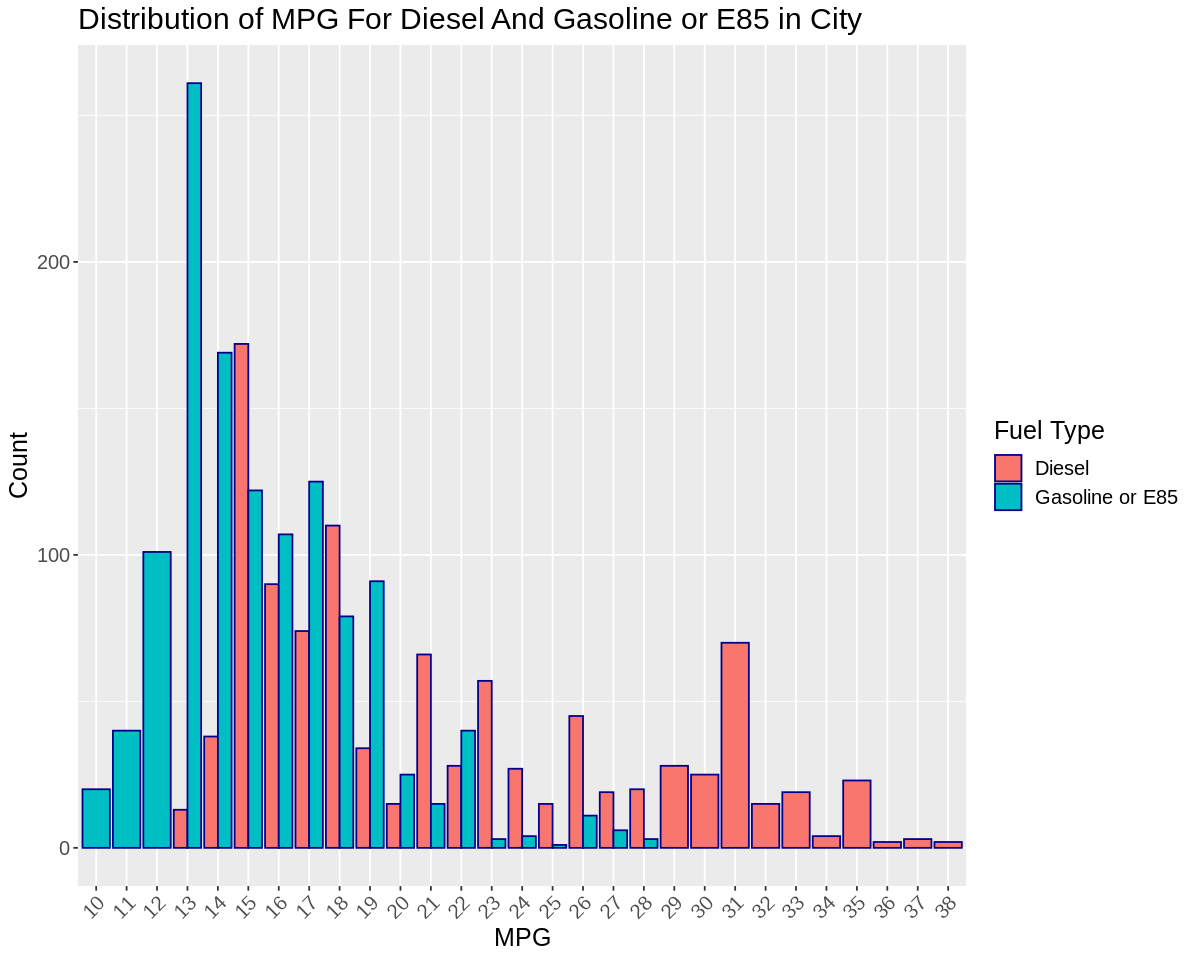

In [9]:
options(repr.plot.width=10, repr.plot.height=8)

City_Histogram <- df %>% 
    select('Fuel.Type','City.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'City.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Diesel" | fuel_type == "Gasoline or E85") %>%
     ggplot() +
     geom_histogram(aes( x=  MPG ,fill = fuel_type),position="dodge", stat="count",color="darkblue")+
     ggtitle("Distribution of MPG For Diesel And Gasoline or E85 in City") + 
     xlab("MPG") +
     ylab("Count") + 
    theme(text = element_text(size = 15)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
guides(fill=guide_legend(title="Fuel Type"))
    
City_Histogram

Plot I: *Histogram of the Distribution of MPG For Diesel And Gasoline or E85 In City*

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


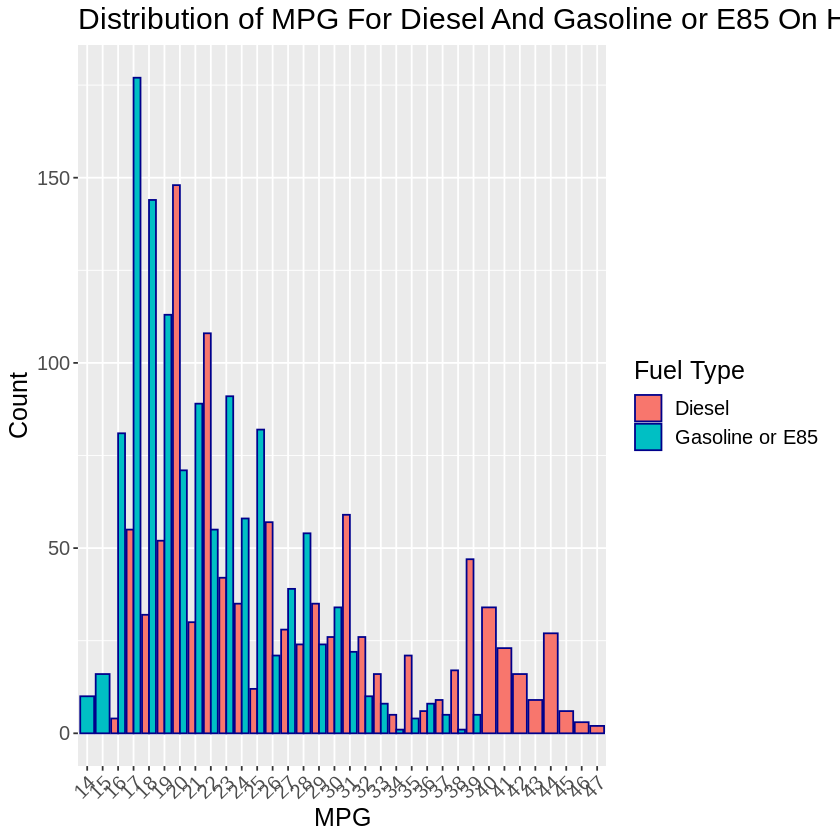

In [8]:
#$df$"Fuel Type 1
Highway_Histogram <- df %>% 
    select('Fuel.Type','Highway.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'Highway.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Diesel" | fuel_type == "Gasoline or E85") %>%
     ggplot() +
     geom_histogram(aes( x=  MPG ,fill = fuel_type),position="dodge", stat="count",color="darkblue")+
     ggtitle("Distribution of MPG For Diesel And Gasoline or E85 On Highway ") + 
     xlab("MPG") +
     ylab("Count") + 
    theme(text = element_text(size = 15)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
guides(fill=guide_legend(title="Fuel Type"))
Highway_Histogram

Plot II: *Histogram of the Distribution of MPG For Diesel And Gasoline or E85 On Highway*

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


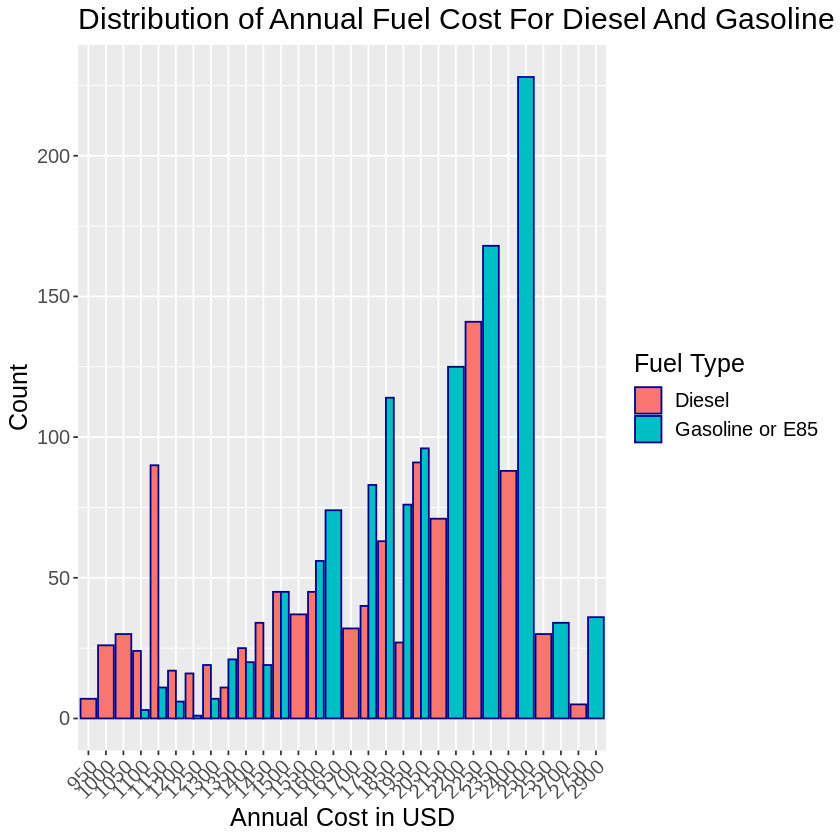

In [7]:
Price_Histogram <- df %>% 
    select('Fuel.Type','Annual.Fuel.Cost..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), Price = as_factor(df$'Annual.Fuel.Cost..FT1.')) %>%
    select(fuel_type, Price)%>%
    filter(fuel_type == "Diesel" | fuel_type == "Gasoline or E85") %>%
    
     ggplot() +
#      geom_histogram(aes( x=  Price ,fill = fuel_type, color=fuel_type, stat="identity"),binwidth=30, ,stat="count")+#, stat="dodge") +
     geom_histogram(aes( x=  Price ,fill = fuel_type) ,position="dodge", stat="count",color="darkblue")+
     ggtitle("Distribution of Annual Fuel Cost For Diesel And Gasoline or E85 ") + 
    labs(x = "Annual Cost in USD", y = "Count")+
    theme(text = element_text(size = 15)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+ 
guides(fill=guide_legend(title="Fuel Type"))
Price_Histogram

Plot III: *Histogram of the Distribution of Fuel Cost For Diesel And Gasoline or E85*

From these histograms, we can see that the distribution of MPG for the diesel and gasoline are relatively spread out. But, the distribution for diesel is much more spread out for both the case of Highway MPG and City MPG. This observation is justified when we compared the IQRs of the following variables with the IQR of diesel (City:10, Highway:12) being larger than that of gasoline’s (City:4, Highway:7).

## Methods :Plan

Back when we compared the medians of the dataset, we found that the median of diesel (City: 19, Highway: 25) is higher than the median of gasoline’s (City: 15, Highway: 20). This would suggest that diesel is more efficient than the gasoline cars due to a higher MPG. However, the dataset that we are working is only a sample of all the diesel and gasoline cars available. Hence, drawing a conclusion here isn’t justified. To explore the dataset further, we will be performing hypothesis tests using bootstrap sampling in order to get a more robust conclusion.

The hypothesis test that we will be performing will test the following null and alternative hypothesis.

H0: The difference in mean MPG between Diesel and Gasoline are the same.

H1: The difference in mean MPG between Diesel and Gasoline are different.

We expect to find a relation between the factors we have chosen for fuel type and fuel efficiency.
The assumption for this hypothesis is that the dataset was sampled randomly and is normally distributed.
We perform hypothesis testing based on results from the assumption of normality and the Central Limit Theorem.

 From the plot visualization above, we expect diesel fuel has better efficiency on both city roads and highways. Knowing these factors can help a vehicle customer decide the type of car to save money on fuel spending. The report also gives the customer an option to compare the results with their driving habits, whether they drive more city roads or highways (if a car is more efficient on a highway than in the city and vice versa). This result could lead to future questions regarding the generality of the studies as we are only comparing cars from a specific time range and a selected number of gasoline and diesel cars brands. The project can be repeated with a dataset based on more recent cars and a wider variety of car brands.

#### References 
Baures, L. (2019, July 16). Pickup Trucks: Gas vs Diesel. Trusted Auto Professionals. https://tap.fremontmotors.com/pickup-trucks-gas-vs-diesel/

Chevrolet, S. (2021, March 10). What Is the Difference Between Diesel and Gas? Sweeney	Chevrolet. https://www.sweeneychevrolet.com/blog/what-is-the-difference-between-diesel-and-gas/

Gas vs. Diesel Engines: What’s the Difference? (2021). UTI Corporate. https://www.uti.edu/blog/diesel/gas-vs-diesel-engines

In [11]:
# testing <- tidy(t.test(x = df %>% as.numeric(City_MPG)))
# tidy_data
library(broom)
x_data <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% pull(as.numeric(City_MPG))
y_data <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% pull(as.numeric(City_MPG))
x_data
y_data
city_test <- tidy(
            t.test(x = x_data, 
                   y = y_data, 
                   alternative = "two.sided"))
city_test

[1] 21 21 21 21 21 21 18 18 21 18 20 18 19 18 18 18 21 18 17 17 18 18 18 17
  [25] 17 18 17 18 18 21 21 21 21 21 21 28 33 33 18 18 16 15 17 18 17 17 18 18
  [49] 18 18 16 15 17 17 17 16 17 16 16 15 18 18 26 26 26 26 16 15 15 15 23 22
  [73] 26 24 35 31 31 31 31 25 31 31 17 17 18 18 18 16 15 17 17 18 17 18 18 18
  [97] 16 15 17 18 16 15 16 15 17 17 17 15 15 16 17 16 26 26 26 26 17 17 18 18
 [121] 27 31 26 26 33 30 30 23 23 29 28 27 25 24 20 21 20 21 31 31 25 25 27 26
 [145] 26 26 27 26 21 21 21 21 21 21 21 21 21 35 31 31 31 31 31 31 26 24 23 22
 [169] 26 24 29 37 38 33 33 29 32 33 18 22 21 21 21 21 21 21 18 20 18 19 18 18
 [193] 18 21 18 21 21 21 21 23 22 23 22 21 21 21 21 21 22 28 33 33 21 21 21 21
 [217] 21 21 18 18 18 18 18 18 18 29 29 35 33 33 28 27 26 24 35 33 31 31 31 25
 [241] 25 32 31 29 28 25 25 32 31 29 28 27 35 35 33 22 23 22 23 21 21 22 21 23
 [265] 23 23 23 19 19 18 18 20 18 18 17 18 19 19 17 17 18 18 18 15 17 16 18 23
 [289] 23 23 23 33 15 15 16 17 18 18 18 15 15 15 16 17 15 15 26 26 25 26 15 15
 [313] 15 14 22 24 23 31 36 31 31 25 23 31 17 18 18 18 15 15 15 17 16 15 15 16
 [337] 15 15 15 16 17 15 14 15 15 26 26 25 26 17 18 26 30 23 30 27 28 23 21 25
 [361] 20 20 31 26 26 19 19 19 19 19 19 31 36 31 31 31 24 26 22 24 38 37 24 26
 [385] 18 23 23 23 20 18 18 18 19 19 18 22 24 22 33 23 23 23 23 18 18 18 26 29
 [409] 32 28 26 27 23 31 31 31 28 28 21 22 21 17 18 18 15 16 33 16 16 17 18 15
 [433] 15 16 16 15 15 16 15 31 34 31 25 24 31 17 18 18 16 15 16 16 16 17 18 15
 [457] 15 16 16 15 15 15 23 30 26 27 23 24 24 24 24 24 26 25 21 31 31 31 37 26
 [481] 21 24 21 26 15 31 31 31 21 22 21 16 16 17 18 17 18 18 16 15 16 15 15 16
 [505] 16 14 15 15 16 31 24 23 16 16 17 18 17 18 18 16 15 16 15 15 16 16 14 15
 [529] 15 16 30 26 27 23 22 24 24 26 25 24 22 19 21 31 21 21 31 17 18 16 18 15
 [553] 16 16 18 15 16 15 16 15 15 15 17 18 16 18 15 16 16 18 15 16 15 16 15 15
 [577] 15 26 15 17 16 16 16 15 16 16 18 15 16 15 15 15 15 16 16 15 16 16 18 15
 [601] 15 15 15 17 16 15 16 15 24 31 31 15 16 17 15 16 15 16 15 15 15 15 15 14
 [625] 15 16 15 16 15 15 15 15 16 17 15 15 14 23 19 31 15 16 17 18 15 17 17 15
 [649] 15 15 15 16 15 15 17 15 14 15 17 17 15 15 15 15 15 15 16 17 18 15 15 16
 [673] 17 14 23 19 19 31 31 16 18 15 17 14 15 15 16 15 17 15 17 14 15 15 17 16
 [697] 18 15 16 23 18 31 16 16 15 16 15 15 15 16 16 15 15 16 16 15 16 15 16 15
 [721] 16 15 23 18 14 15 15 17 15 15 14 15 15 15 17 15 14 15 15 15 15 15 17 14
 [745] 14 15 15 15 17 15 14 15 15 14 19 15 15 17 15 14 14 14 14 15 17 14 13 14
 [769] 15 13 15 15 15 17 14 14 14 15 14 17 13 14 14 15 13 23 19 15 14 15 14 15
 [793] 14 15 14 24 34 34 31 31 14 13 14 14 14 14 23 33 33 32 32 13 13 13 13 13
 [817] 13 23 33 29 34 27 32 27 32 13 13 23 33 29 35 29 35 29 35 29 35 29 35 29
 [841] 35 29 35 29 35 29 35 29 35 29 35 29 35 29 35 21 29 35 29 35 29 35 29 35
 [865] 28 32 28 32 28 31 30 32 23 23 15 19 23 28 32 28 30 32 31 28 31 30 32 23
 [889] 23 19 23 28 31 30 30 30 31 15 18 17 23 18 19 19 15 18 17 23 18 18 18 15
 [913] 23 19 23 17 18 18 23 19 17 18 18 23 19 19 22 17 18 18 19 21 17 20 18 21
 [937] 19 21 19 24 20 21 31 31 31 26 26 23 27 28 27 19 24 20 31 31 31 31 26 26
 [961] 23 27 24 27 28 27 19 24 22 30 30 30 29 31 30 31 30 31 30 29 30 31 30 30
 [985] 26 26 27 23 22 20 22 20 22 22 28 27 19 22 23 31 30 30 23 22 20 22 20 26
[1009] 32 30 31 30 22 22

[1] 16 16 14 15 16 14 15 17 17 15 16 14 15 16 17 19 16 16 15 13 15 13 15 16
  [25] 16 17 19 17 19 15 16 16 17 19 13 12 13 12 16 16 16 14 14 15 18 17 17 19
  [49] 13 12 13 12 17 19 15 14 13 18 17 13 13 13 13 12 13 13 13 13 13 13 19 19
  [73] 17 16 17 19 14 14 15 17 17 13 12 13 13 13 13 13 13 15 14 14 17 17 13 13
  [97] 13 13 12 13 13 13 13 13 13 19 19 19 19 11 11 19 19 14 14 14 14 17 17 13
 [121] 12 13 13 13 13 13 13 14 13 17 17 13 13 14 13 14 13 13 14 13 13 19 19 19
 [145] 19 16 16 11 11 19 19 13 13 13 13 17 17 14 13 14 13 13 13 13 13 13 13 17
 [169] 17 13 12 13 13 18 19 14 14 13 13 14 13 19 19 17 11 11 11 11 19 19 15 12
 [193] 12 17 14 13 14 13 13 13 15 15 13 12 16 14 14 13 12 18 19 14 14 13 14 14
 [217] 14 14 14 16 12 13 14 13 13 12 19 13 12 13 12 15 13 12 13 12 13 13 14 12
 [241] 13 14 14 13 14 14 14 14 14 14 14 14 14 15 15 12 12 12 12 16 14 14 12 12
 [265] 18 18 15 14 14 14 14 14 16 12 12 14 13 14 13 19 18 17 19 17 14 14 14 13
 [289] 13 13 13 12 15 13 13 14 12 12 12 14 12 13 15 14 14 14 14 14 14 13 14 14
 [313] 15 15 14 14 12 12 12 12 17 12 12 12 14 13 13 22 22 22 21 22 22 22 21 19
 [337] 17 19 14 14 13 15 14 14 12 14 14 12 14 12 15 14 13 14 13 14 13 19 18 17
 [361] 19 17 14 14 14 13 14 13 16 14 14 14 14 13 14 13 13 13 14 14 13 15 14 14
 [385] 12 12 14 12 14 12 15 12 14 12 14 13 14 14 14 16 16 14 14 12 12 13 12 13
 [409] 19 13 13 17 14 13 14 15 12 13 13 13 13 13 13 22 22 22 22 22 22 22 22 17
 [433] 18 22 19 22 14 15 13 15 13 15 12 15 12 15 15 18 19 17 19 14 14 17 14 13
 [457] 16 18 19 14 12 14 14 18 19 13 13 13 13 13 13 14 15 13 15 13 15 12 12 15
 [481] 14 15 13 15 14 12 13 13 14 16 18 19 16 18 19 18 19 12 12 13 12 22 22 19
 [505] 22 13 13 17 18 20 14 13 14 13 13 15 15 16 17 13 13 13 13 13 13 10 10 11
 [529] 11 10 11 22 21 22 22 22 21 22 22 17 19 22 14 15 12 15 13 15 12 15 15 15
 [553] 15 19 18 19 17 19 18 14 14 16 16 17 17 14 13 16 12 13 12 13 13 12 12 11
 [577] 18 19 14 13 11 17 15 17 15 14 16 16 14 18 20 13 13 13 13 11 13 13 10 11
 [601] 10 10 11 14 15 12 15 13 15 12 12 16 17 15 14 15 13 15 14 15 13 16 16 14
 [625] 13 11 16 18 19 16 18 19 18 20 13 12 13 12 18 20 13 13 17 17 17 16 18 19
 [649] 18 20 21 14 13 14 13 13 17 16 15 15 20 16 22 17 13 13 13 13 13 13 10 10
 [673] 11 11 10 11 10 18 22 14 15 13 15 13 15 12 15 15 15 15 19 19 19 18 17 19
 [697] 19 18 16 16 17 17 14 14 13 12 13 12 13 12 12 11 18 19 14 13 17 15 17 15
 [721] 16 14 16 14 27 27 26 28 18 20 13 13 13 13 13 13 10 11 11 10 10 11 10 14
 [745] 15 13 15 13 15 12 12 20 16 22 17 15 14 15 13 15 14 15 13 17 16 14 13 13
 [769] 12 13 12 17 18 20 19 20 18 20 18 20 13 13 17 17 17 18 18 19 20 21 19 18
 [793] 14 13 14 13 13 17 16 15 15 16 20 17 20 16 17 22 13 13 13 13 13 13 10 11
 [817] 11 11 11 18 14 15 13 15 13 15 12 15 15 15 15 19 19 19 18 17 19 18 19 18
 [841] 24 16 16 17 17 13 12 13 12 13 12 12 12 14 13 17 17 15 17 15 17 14 16 14
 [865] 16 27 27 26 28 18 19 13 13 13 13 13 13 11 11 10 11 11 14 15 13 15 13 15
 [889] 12 12 20 16 22 17 15 14 15 13 15 14 15 13 17 16 14 13 13 12 13 12 14 17
 [913] 14 16 17 13 13 17 18 17 14 13 14 13 16 17 20 20 16 17 22 13 13 13 13 13
 [937] 13 10 11 11 19 18 16 18 16 17 15 15 15 15 19 19 19 18 17 19 18 19 18 24
 [961] 17 18 17 17 12 13 12 13 12 13 12 12 14 13 17 17 17 15 17 15 16 14 16 14
 [985] 26 26 26 28 18 19 13 13 13 13 13 13 11 10 11 16 18 16 17 20 16 17 22 15
[1009] 14 13 15 15 14 15 13 17 17 14 13 13 12 13 12 17 16 18 13 13 17 18 17 20
[1033] 20 22 10 11 11 19 18 16 18 15 16 16 17 15 16 16 15 16 16 23 19 19 18 18
[1057] 17 19 18 24 17 18 17 17 17 17 15 18 15 17 27 26 26 18 19 14 11 10 11 16
[1081] 18 15 16 16 17 15 16 22 16 16 16 15 21 21 17 17 22 13 12 13 12 17 16 18
[1105] 13 13 18 17 20 22 19 18 16 18 16 17 16 15 16 16 23 19 19 18 18 17 19 18
[1129] 24 17 17 17 16 14 14 15 18 15 17 26 27 26 17 18 20 19 19 14 16 18 16 17
[1153] 22 16 16 16 15 21 21 22 17 16 13 13 13 20 21 19 18 16 16 17 16 15 16 16
[1177] 23 19 19 18 18 19 18 17 17 21 17 16 15 14 14 15 18 15 17 26 26 25 17 18
[1201] 20 19 19 14 18 16 16 17 21 16 16 16 15 21 21 2

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.81619,21.22584,15.40965,26.98404,3.997089e-130,1439.726,5.39338,6.239,Welch Two Sample t-test,two.sided
